# Análise de dados com Python
----------------------------------
Case: Bemol Vendas

##### O seguinte caso tem como objetivo fazer análise de dados sobre um planilha de vendas contendo algumas características que devem ser avaliadas e entendidas no contexto do negócio.

As KPIs são definidas da seguinte forme:
- 1: determinar a unidade que mais vendeu;
- 2: analisar a porcentagem de CPFs nas notas, a porcentagem de imposto, a porcentagem de devoluções;
- 3: quanto o dinheiro de retorno rendeu em descontos;
- 4: vendas por vendedor;
- 5: produto mais vendido;

Os itens (1), (2), (4) e (5) estão relacionados com a primeira planilha, equanto o item (3) com a segunda.

------------------------

Análise de dados e códigos

-----

O desenvolvimento abaixo se trata de uma análise preliminar sobre a estrutura dos dados analisados, corrigindo, alterando e estruturando melhor nossos dados para podermos ter uma análise mais completa e assim sermos capazes de responder os problemas propostos

In [1]:
# Vamos utilizar a biblioteca pandas para carregar os arquivos em Excel e fazer todo o tratamento necessário

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_excel("Desafio - Time de Projetos e Dados.xlsx", sheet_name=1)
df2 = pd.read_excel("Desafio - Time de Projetos e Dados.xlsx", sheet_name=2)

In [3]:
# analisando a estrutura dos dados importados

df1.head(10)

,num_compra,usuario,nome,Tipo de Mercadoria,Filial,data_compra,valor_compra,Imposto,CPF NA NOTA?,Produto Devolvido,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,23296458,303591,ADALBERTO,ARQ/GAVETEIRO ESCRIT,Loj Lábrea,31/05/2021 20:51:54,25.984,1.16928,Sim,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23296247,464616,NASCIMENTO,TERMÔMETRO,Loja Manicor é,31/05/2021 20:41:51,31.180,1.40310,Sim,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23296075,377229,PEDRO,SPLIT 10001 À 18000,Loja Manicor é,31/05/2021 20:33:29,637.440,28.68480,Sim,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23296050,216660,KEILA,SABONETE/GEL P/BANHO,Loj Lábrea,31/05/2021 20:31:20,24.116,1.08522,Sim,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23295921,374064,LAURIANA,SPLIT 10001 À 18000,Loja Manicor é,31/05/2021 20:23:05,10303.200,463.64400,Sim,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,23295531,264184,ROZENIRA,VIDEO GAMES 1,Loja Manicor é,31/05/2021 20:12:42,27.184,1.22328,Sim,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,23295465,90129,ANA,ÓLEOS,Loja Autazes,31/05/2021 20:11:14,19.032,0.85644,Sim,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,23294905,92752,FABIULA,FOGÃO 6 BOCAS,Loj Lábrea,31/05/2021 19:45:25,11.380,0.51210,Sim,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,23294874,92752,FABIULA,BICA D'ÁGUA,Loja Autazes,31/05/2021 19:45:17,6.780,0.30510,Sim,Sim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23294400,385148,LUANA,CAMA DE CASAL,Loj Lábrea,31/05/2021 19:28:12,42.912,1.93104,Sim,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2.head(10)

,cod_Loja,data_compra,inicio,termino,Loja,cod_Produto,produto,EAN,Valor Unitário Sem Imposto,quantidade,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,410,2019-07-05 10:30:41,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410,2019-07-05 11:58:18,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,410,2019-07-05 14:06:58,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,410,2019-07-05 14:50:06,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,410,2019-07-05 16:04:56,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,410,2019-07-05 16:09:36,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,410,2019-07-05 16:26:21,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,410,2019-07-05 16:33:10,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,410,2019-07-05 16:39:39,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,410,2019-07-05 16:58:18,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos começar por analisar, filtrar e reescrever por primeira planhilha carregada em df1

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13877 entries, 0 to 13876
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_compra          13877 non-null  int64  
 1   usuario             13877 non-null  int64  
 2   nome                13877 non-null  object 
 3   Tipo de Mercadoria  13877 non-null  object 
 4   Filial              13877 non-null  object 
 5   data_compra         13877 non-null  object 
 6   valor_compra        13877 non-null  float64
 7   Imposto             13877 non-null  float64
 8   CPF NA NOTA?        13877 non-null  object 
 9   Produto Devolvido   13877 non-null  object 
 10  Motivo Devolução    6915 non-null   object 
 11  Unnamed: 11         0 non-null      float64
 12  Unnamed: 12         0 non-null      float64
 13  Unnamed: 13         0 non-null      float64
 14  Unnamed: 14         0 non-null      float64
 15  Unnamed: 15         0 non-null      float64
 16  Unna

   Os campos de *num_compra*, *usuario*, *data_compra* devem ter seus tipos modificados. Como *num_compra* e *usuario* são identificações no sistema (como chaves primárias e estrangeiras de um banco de dados relacional) podemos tratá-las apenas como uma string, enquanto *data_compra* deve ser do tipo data. Outra coisa que podemos melhorar é o campo *CPF NA NOTA?* e *Produto Devolvido* trocando seus valores de strings em booleanos, onde 0 representa $não$ e 1 respresenta $sim$.
   Devemos também alterar o nome das colunas para facilitar o uso das chamadas de métodos sobre as colunas.

In [6]:
# trocando o nome das colunas para facilitar a análise
df1.dropna(axis=1, how="all", inplace=True)
df1.columns = ['idCompra', 'usuario', 'nome', 'mercadoria', 'filial', 'data',
               'valor', 'imposto', 'cpf', 'devolvido', 'motivo_devolvido']

In [7]:
# conversão de colunas para os tipos adequados

df1.idCompra = df1.idCompra.astype(str)
df1.usuario = df1.usuario.astype(str)
df1.nome = df1.nome.astype(str)
df1.data = pd.to_datetime(df1["data"], errors='coerce')

# devemos perceber que a coluna cpf possui o problema de todos os nãos estarem
# escritos de maneira errada, com a troca por um booleano
# este tipo de erro é evitado (o ideal é entender por que os dados estão sendo
# extraídos errado da fonte, mas isto foge do escopo desta análise).

df1.cpf = df1.cpf.map(lambda x: True if x == 'Sim' else False)
df1.devolvido = df1.devolvido.map(lambda x: True if x == 'Sim' else False)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13877 entries, 0 to 13876
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   idCompra          13877 non-null  object        
 1   usuario           13877 non-null  object        
 2   nome              13877 non-null  object        
 3   mercadoria        13877 non-null  object        
 4   filial            13877 non-null  object        
 5   data              13877 non-null  datetime64[ns]
 6   valor             13877 non-null  float64       
 7   imposto           13877 non-null  float64       
 8   cpf               13877 non-null  bool          
 9   devolvido         13877 non-null  bool          
 10  motivo_devolvido  6915 non-null   object        
dtypes: bool(2), datetime64[ns](1), float64(2), object(6)
memory usage: 1003.0+ KB


In [9]:
df1.head(10)

,idCompra,usuario,nome,mercadoria,filial,data,valor,imposto,cpf,devolvido,motivo_devolvido
0,23296458,303591,ADALBERTO,ARQ/GAVETEIRO ESCRIT,Loj Lábrea,2021-05-31 20:51:54,25.984,1.16928,True,False,NaN
1,23296247,464616,NASCIMENTO,TERMÔMETRO,Loja Manicor é,2021-05-31 20:41:51,31.180,1.40310,True,False,NaN
2,23296075,377229,PEDRO,SPLIT 10001 À 18000,Loja Manicor é,2021-05-31 20:33:29,637.440,28.68480,True,True,Insatisfação com o produto
3,23296050,216660,KEILA,SABONETE/GEL P/BANHO,Loj Lábrea,2021-05-31 20:31:20,24.116,1.08522,True,True,Antecipação de troca
4,23295921,374064,LAURIANA,SPLIT 10001 À 18000,Loja Manicor é,2021-05-31 20:23:05,10303.200,463.64400,True,True,Insatisfação com o atendimento
5,23295531,264184,ROZENIRA,VIDEO GAMES 1,Loja Manicor é,2021-05-31 20:12:42,27.184,1.22328,True,True,Insatisfação com o atendimento
6,23295465,90129,ANA,ÓLEOS,Loja Autazes,2021-05-31 20:11:14,19.032,0.85644,True,False,NaN
7,23294905,92752,FABIULA,FOGÃO 6 BOCAS,Loj Lábrea,2021-05-31 19:45:25,11.380,0.51210,True,True,Problema na Entrega
8,23294874,92752,FABIULA,BICA D'ÁGUA,Loja Autazes,2021-05-31 19:45:17,6.780,0.30510,True,True,Insatisfação com o produto
9,23294400,385148,LUANA,CAMA DE CASAL,Loj Lábrea,2021-05-31 19:28:12,42.912,1.93104,True,False,NaN


Há problemas também com os nomes das filiais. Vejamos:

In [10]:
# verificando a estrutura das lojas filiais e o que consertar
df1.filial.unique()

array(['Loj Lábrea ', 'Loja Manicor é ', 'Loja Autazes',
       'Loja manAcaPuru ', 'Loja itacoati_ara', 'Loja manAcaPuru'],
      dtype=object)

Existem erros de grafia nas lojas de referência e uma mesma loja com duas grafias. Corrigimos isso com o seguinte código:

In [11]:
def corrige_nome_loja(x):
    if x == 'Loja Manicor é ':
        x = 'Loja Manicoré'
    elif x == 'Loj Lábrea ':
        x = 'Loja Lábrea'
    elif x == 'Loja itacoati_ara':
        x = 'Loja Itacoatiara'
    elif x == 'Loja manAcaPuru' or x == 'Loja manAcaPuru ':
        x = 'Loja Manacapuru'
    else:
        pass  # a loja de Autazes é a única sem nenhum problema, portanto não precisa ser avaliada
    return x

In [12]:
df1.filial = df1.filial.map(corrige_nome_loja)

Agora temos os nomes das lojas corrigidos

In [13]:
df1.filial.unique()

array(['Loja Lábrea', 'Loja Manicoré', 'Loja Autazes', 'Loja Manacapuru',
       'Loja Itacoatiara'], dtype=object)

Vamos agora definir os relacionamentos e verificar as principais características das lojas e suas vendas

In [14]:
loja = df1.groupby(['filial'])
loja.describe()

valor                                                  \
                   count        mean          std    min     25%     50%   
filial                                                                     
Loja Autazes      2713.0   73.836208   302.986770  0.416   6.660  14.084   
Loja Itacoatiara  1214.0  193.300138  1246.394243  0.368  15.004  32.196   
Loja Lábrea       4072.0  109.557408   565.487753  0.596  10.622  22.188   
Loja Manacapuru   1793.0   87.272506   661.182759  0.476  10.296  23.848   
Loja Manicoré     4085.0  194.487824  1034.052635  0.304  14.540  35.896   

                                   imposto                                \
                     75%       max   count      mean        std      min   
filial                                                                     
Loja Autazes      27.708   4887.36  2713.0  3.322629  13.634405  0.01872   
Loja Itacoatiara  72.110  24845.04  1214.0  8.698506  56.087741  0.01656   
Loja Lábrea       46.744  11869.44  4072.0  4.930083  25.446949  0.02682   
Loja Manacapuru   51.196  24845.04  1793.0  3.927263  29.753224  0.02142   
Loja Manicoré     84.488  24845.04  4085.0  8.751952  46.532369  0.01368   

                                                        
                      25%      50%      75%        max  
filial                                                  
Loja Autazes      0.29970  0.63378  1.24686   219.9312  
Loja Itacoatiara  0.67518  1.44882  3.24495  1118.0268  
Loja Lábrea       0.47799  0.99846  2.10348   534.1248  
Loja Manacapuru   0.46332  1.07316  2.30382  1118.0268  
Loja Manicoré     0.65430  1.61532  3.80196  1118.0268

In [15]:
df1.describe()

,valor,imposto
count,13877.000000,13877.000000
mean,132.021628,5.940973
std,788.208066,35.469363
min,0.304000,0.013680
25%,10.384000,0.467280
50%,23.996000,1.079820
75%,54.776000,2.464920
max,24845.040000,1118.026800


Ao observamos o desempenho médio das lojas, vemos que a mediana (linha de $50\%$ na tabela acima) está bem afastada da média de valor vendido (linha *mean* na tabela), o que pode indicar que possíveis produtos com valor elevado forçam o ticket médio de venda a subir.
Podemos verificar se isso é verdade ou não com o gráfico de caixa a seguir:

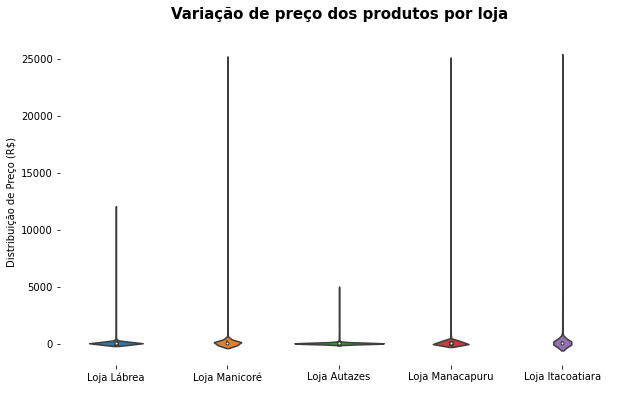

In [16]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("flare", as_cmap=True)
ax = sns.violinplot(x='filial', y='valor', data=df1, colors=colors)
ax.set_xlabel(' ')
ax.set_ylabel("Distribuição de Preço (R$)")
ax.set_title('Variação de preço dos produtos por loja', pad=20, fontsize=15,
             color='black', fontweight='bold')
sns.despine(bottom=True, left=True)
plt.savefig('Variação de preço dos produtos por loja.jpg', bbox_inches='tight')
plt.show()

Fica claro a situação que temos. 75% das vendas se concentram em produtos de ticket médio que não passam de __R`$`55,00__ , com exeção da Loja Manicoré e Itacoatiara com __R`$`85,00__ e __R`$`72,00__  aproximadamente, respectivamente.

Analisando as lojas pelo total de vendas teremos 

In [17]:
# função auxiliar para escrever o rótulo de dados nos gráficos de barras e histogramas que faremos mais a frente

def add_labels(ax, space=5, form=0, prefix='', orient='v'):
    for rect in ax.patches:
        if orient == 'v':
            a_value = rect.get_height()
            b_value = rect.get_x() + rect.get_width()/2
            xytext = (0, space)
            va = 'bottom'
            ha = 'center'
            x, y = b_value, a_value
        else:
            a_value = rect.get_width()
            b_value = rect.get_y() + rect.get_height() / 2
            xytext = (space, 0)
            va = 'center'
            ha = 'left'
            x, y = a_value, b_value
        label = f"{prefix} {a_value:.{form}f}"
        plt.annotate(label, (x, y), xytext=xytext,
                     textcoords='offset points', va=va, ha=ha)

In [18]:
loja.valor.sum()

filial
Loja Autazes        200317.632
Loja Itacoatiara    234666.368
Loja Lábrea         446117.764
Loja Manacapuru     156479.604
Loja Manicoré       794482.760
Name: valor, dtype: float64

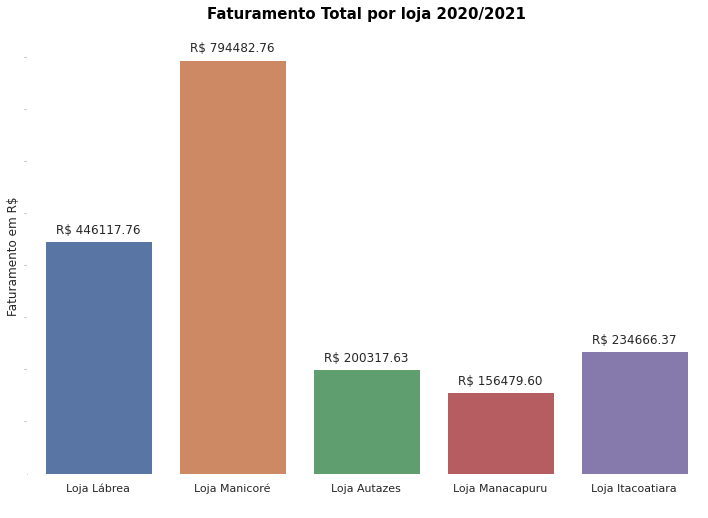

In [19]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=True)
ax = sns.barplot(x='filial', y='valor', data=df1, ci=None, estimator=np.sum)
ax.set_xlabel(' ')
ax.set_ylabel("Faturamento em R$")
ax.set_title('Faturamento Total por loja 2020/2021', pad=20, fontsize=15,
             color='black', fontweight='bold')
plt.tick_params(axis='y', labelsize=0, length=0)
add_labels(ax, form=2, prefix='R$')
sns.despine(bottom=True, left=True)
plt.savefig('Faturamento por loja 2020-2021.jpg', bbox_inches='tight')
plt.show()

Fica claro então que a Loja Manicoré é a com maior faturamento em todo o período. 
Podemos ainda observar o efeito do faturamento das lojas se não contarmos os produtos devolvidos na soma total e como isso dá o real crescimento das lojas filiais.

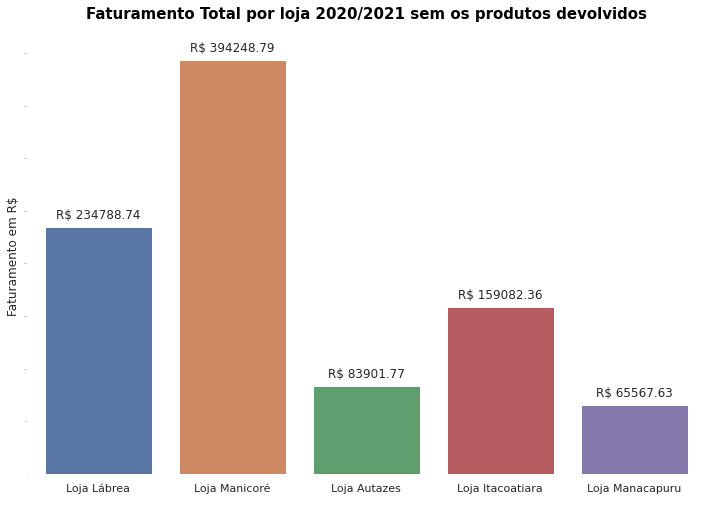

In [20]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=True)
ax = sns.barplot(x='filial', y='valor', data=df1[df1.devolvido == False], ci=None, estimator=np.sum)
ax.set_xlabel(' ')
ax.set_ylabel("Faturamento em R$")
ax.set_title('Faturamento Total por loja 2020/2021 sem os produtos devolvidos', pad=20, fontsize=15,
             color='black', fontweight='bold')
plt.tick_params(axis='y', labelsize=0, length=0)
add_labels(ax, form=2, prefix='R$')
sns.despine(bottom=True, left=True)
plt.savefig('Faturamento Total por loja 2020-2021 sem os produtos devolvidos.jpg')
plt.show()

Podemos também observar o faturamento líquido, ou seja, descontando os impostos, não mudam o rankeamento das lojas

/home/carmeli/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/carmeli/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


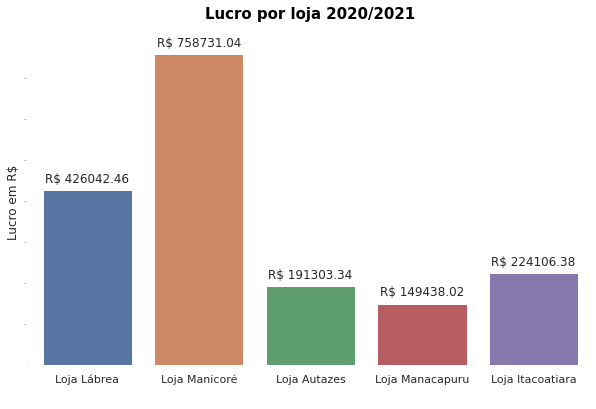

In [21]:
# gráfico de faturamento líquido por loja descontando os impostos.
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")
sns.color_palette("flare", as_cmap=True)
valor_liquido = df1[['filial', 'valor', 'imposto']]
valor_liquido.loc[:, 'valor_liquido'] = pd.Series(np.zeros(len(valor_liquido.index)),dtype='float64')
for x in range(len(df1.index)):
    valor_liquido.loc[x, 'valor_liquido'] = df1.loc[x, 'valor']-df1.loc[x, 'imposto']
ax = sns.barplot(x='filial', y='valor_liquido', data=valor_liquido, ci=None, estimator=np.sum)
ax.set_xlabel(' ')
ax.set_ylabel("Lucro em R$")
ax.set_title('Lucro por loja 2020/2021', pad=20, fontsize=15,
             color='black', fontweight='bold')
plt.tick_params(axis='y', labelsize=0, length=0)
add_labels(ax, form=2, prefix='R$')
sns.despine(bottom=True, left=True)
plt.savefig('Lucro por loja 2020-2021.jpg')
plt.show()

Analisando agora os impostos incidentes no preço das mercadorias na venda de cada loja e no total

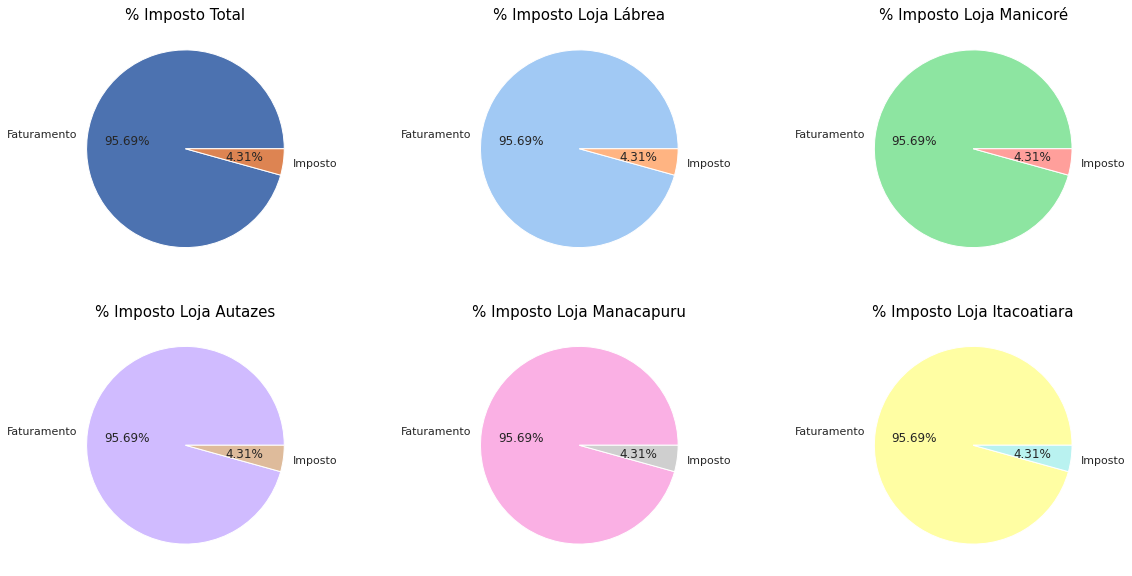

In [22]:
plt.figure(figsize=(20, 10))


# Porcentagem sobre o imposto total
ax1 = plt.subplot2grid((2, 3), (0, 0))
plt.pie([df1.valor.sum(), df1.imposto.sum()], labels=['Faturamento', 'Imposto'], autopct='%.2f%%')
plt.title('% Imposto Total', fontsize=15, color='black')

# Loop para carregar e plotar todos os gráficos

x, y = 0, 1  # começamos com  y=1, pois a posição 0,0 já foi preenchida, sendo a próxima a 0,1.
color = 0
for filial in df1.filial.unique():
    plt.subplot2grid((2, 3), (x, y))
    colors = sns.color_palette('pastel')[color:color + 2]
    plt.pie([df1[df1.filial == filial].valor.sum(), df1[df1.filial == filial].imposto.sum()],
            labels=['Faturamento', 'Imposto'], autopct='%.2f%%', colors=colors)
    plt.title(f'% Imposto {filial}', fontsize=15, color='black')
    color += 2
    if y < 2:
        y += 1
    else:
        y = 0
        x += 1

plt.savefig('Percentual de imposto.jpg')
plt.show()

Isto indica que o imposto decorrente não está afetando mais uma loja do que outra.

--------------------
Outra análise que podemos fazer é do valor de vendas feita no período dado e observar o comportamento de vendas em geral, um gráfico particularmente útil é o de linha que nos ajuda a visualizar como as vendas evoluíram com o passar do tempo.

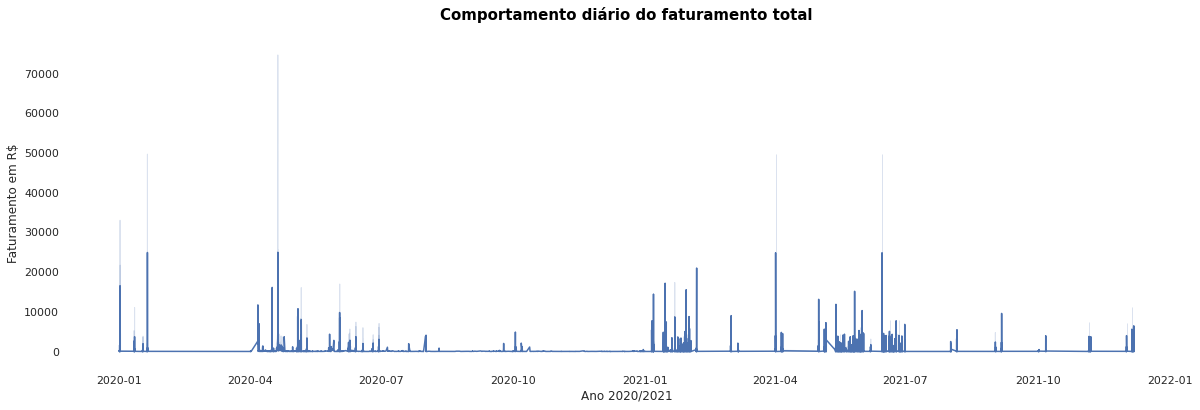

In [23]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='data', y='valor', data=df1.sort_values(by=['data']), estimator='sum')
ax.set_xlabel('Ano 2020/2021')
ax.set_ylabel("Faturamento em R$")
ax.set_title('Comportamento diário do faturamento total', pad=20, fontsize=15,
             color='black', fontweight='bold')
sns.despine(bottom=True, left=True)
plt.savefig('Comportamento diário do faturamento total.jpg')
plt.show()

Pelo gráfico podemos ver uma concentração maior de vendas nos períodos de ínicio e final do primeiro semestre de cada ano.
Analisando pela média móvel de 90 dias podemos olhar melhor a evolução das vendas (e conseguimos "normalizar" as vendas muito altas que tornam o gráfico de difícil leitura).

In [24]:
venda_media = df1.sort_values(by=['data'])  # para trabalhar com análise de eventos no tempo, convém ordernar as informações por data

In [25]:
venda_media = venda_media[['filial', 'data', 'valor', 'imposto']]  # tomando apenas as colunas importantes para análise
venda_media['media_movel'] = venda_media.valor.rolling(90).mean()  # adcionando uma nova coluna com a média móvel de 90 dias

In [26]:
venda_media

,filial,data,valor,imposto,media_movel
13876,Loja Lábrea,2020-01-01 07:52:44,12.676,0.57042,NaN
13872,Loja Autazes,2020-01-01 07:54:04,4.256,0.19152,NaN
13873,Loja Autazes,2020-01-01 07:54:04,1.460,0.06570,NaN
13874,Loja Lábrea,2020-01-01 07:54:04,15.140,0.68130,NaN
13875,Loja Manicoré,2020-01-01 07:54:04,7.000,0.31500,NaN
...,...,...,...,...,...
6331,Loja Lábrea,2021-12-06 21:39:16,27.072,1.21824,287.510178
6330,Loja Manacapuru,2021-12-06 21:44:03,279.960,12.59820,290.239511
6329,Loja Autazes,2021-12-06 21:44:03,8.528,0.38376,290.188489
6328,Loja Manicoré,2021-12-06 21:44:22,89.204,4.01418,291.099778


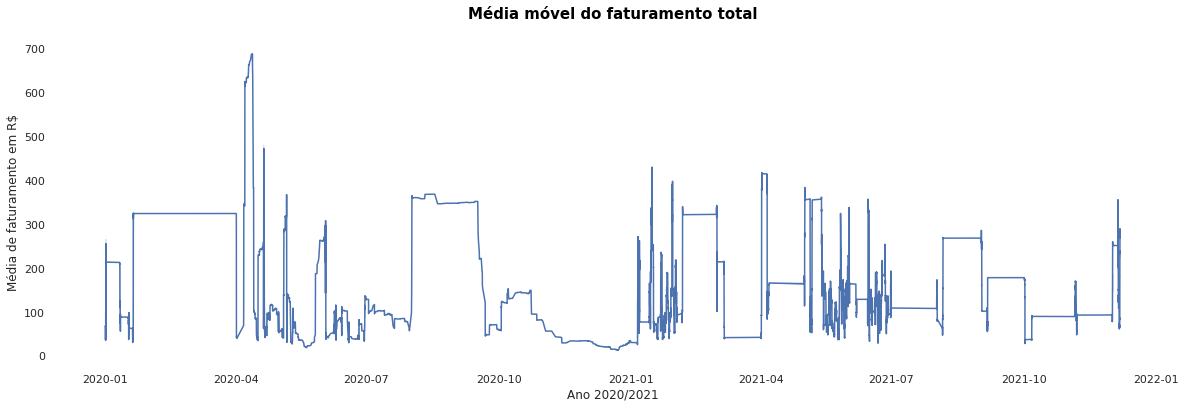

In [27]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='data', y='media_movel', data=venda_media)
ax.set_xlabel('Ano 2020/2021')
ax.set_ylabel("Média de faturamento em R$")
ax.set_title('Média móvel do faturamento total', pad=20, fontsize=15,
             color='black', fontweight='bold')
sns.despine(bottom=True, left=True)
plt.savefig('Média móvel do faturamento total.jpg')
plt.show()

-----
Como temos um número baixo de parâmetros, podemos avaliar a correlação entre elas e procurar mais algum tipo de previsão e análise que podemos fazer ao enxergar a relação que cada parâmetro tem com os outros.

In [28]:
# correlação em cada loja com as variáveis
df1.groupby('filial').corr()

valor   imposto       cpf  devolvido
filial                                                             
Loja Autazes     valor      1.000000  1.000000  0.035074   0.041630
                 imposto    1.000000  1.000000  0.035074   0.041630
                 cpf        0.035074  0.035074  1.000000   0.015614
                 devolvido  0.041630  0.041630  0.015614   1.000000
Loja Itacoatiara valor      1.000000  1.000000  0.018794  -0.062690
                 imposto    1.000000  1.000000  0.018794  -0.062690
                 cpf        0.018794  0.018794  1.000000  -0.013070
                 devolvido -0.062690 -0.062690 -0.013070   1.000000
Loja Lábrea      valor      1.000000  1.000000  0.018932  -0.009143
                 imposto    1.000000  1.000000  0.018932  -0.009143
                 cpf        0.018932  0.018932  1.000000   0.008217
                 devolvido -0.009143 -0.009143  0.008217   1.000000
Loja Manacapuru  valor      1.000000  1.000000 -0.054871   0.020722
                 imposto    1.000000  1.000000 -0.054871   0.020722
                 cpf       -0.054871 -0.054871  1.000000  -0.005188
                 devolvido  0.020722  0.020722 -0.005188   1.000000
Loja Manicoré    valor      1.000000  1.000000  0.015936   0.004595
                 imposto    1.000000  1.000000  0.015936   0.004595
                 cpf        0.015936  0.015936  1.000000   0.001320
                 devolvido  0.004595  0.004595  0.001320   1.000000

Fica claro que as correlações são bem baixas, exceto para o parâmetro de valor da mercadoria e o imposto que há uma correlação perfeita (o que é totalmente justificado, pois toda mercadoria possui um valor e um imposto associado). Todas as outras correlações são muito pequenas, o que pode indicar que elas são independentes, assim poderíamos em primeira observação dizer que a quantidade de produtos devolvidos é independente de se ter ou não CPF na nota de compra, ou mesmo do valor do produto.

Podemos visualizar de uma melhor maneira através de um gráfico de correlação.

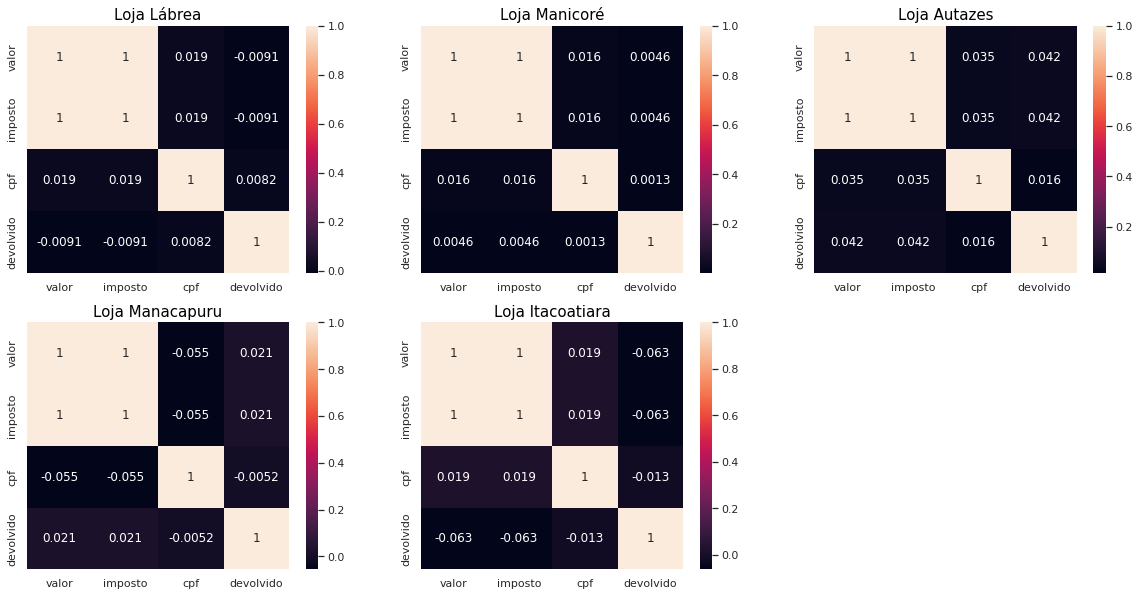

In [29]:
plt.figure(figsize=(20, 10))

x, y = 0, 0
for filial in df1.filial.unique():
    plt.subplot2grid((2, 3), (x, y))
    fig = sns.heatmap(df1[df1.filial == filial].corr(), annot=True)
    fig.set_title(filial, fontsize=15, color='black')
    if y <= 1 and x <= 1:
        y += 1
    else:
        y = 0
        x += 1

plt.savefig('correlação dos parâmetros por loja.jpg')
plt.show()

In [30]:
# função auxiliar para plotar gráficos de uma maneira mais fácil para as próximas análises

def pie_plot(dataframe, parameter, figsize=(10, 8)):
    plt.figure(figsize=figsize)

    plt.subplot2grid((2, 3), (0, 0))
    plt.pie([dataframe[dataframe[f'{parameter}'] == True][f'{parameter}'].count(),
             dataframe[dataframe[f'{parameter}'] == False][f'{parameter}'].count()],
            labels=['Sim', 'Não'], autopct='%.2f%%')
    plt.title(f'% {parameter.upper()} Total', fontsize=15, color='black')

    x, y = 0, 1
    color = 0
    for filial in dataframe.filial.unique():
        plt.subplot2grid((2, 3), (x, y))
        colors = sns.color_palette('pastel')[color:color + 2]
        plt.pie([dataframe[(dataframe[f'{parameter}'] == True) & (dataframe['filial'] == filial)][f'{parameter}'].count(),
                 dataframe[(dataframe[f'{parameter}'] == False) & (dataframe['filial'] == filial)][f'{parameter}'].count()],
                labels=['Sim', 'Não'], autopct='%.2f%%', colors=colors)
        plt.title(f'% {parameter.upper()} filial {filial[5:]}', fontsize=15, color='black')
        color += 2
        if y < 2 and x <= 1:
            y += 1
        else:
            x += 1
            y = 0
    plt.savefig(f'Porcentagens de {parameter}.jpg')
    plt.show()

# Porcentagem de CPF
------------
Passemos agora a entender a relação dos CPFs na nota de compra dos clientes.

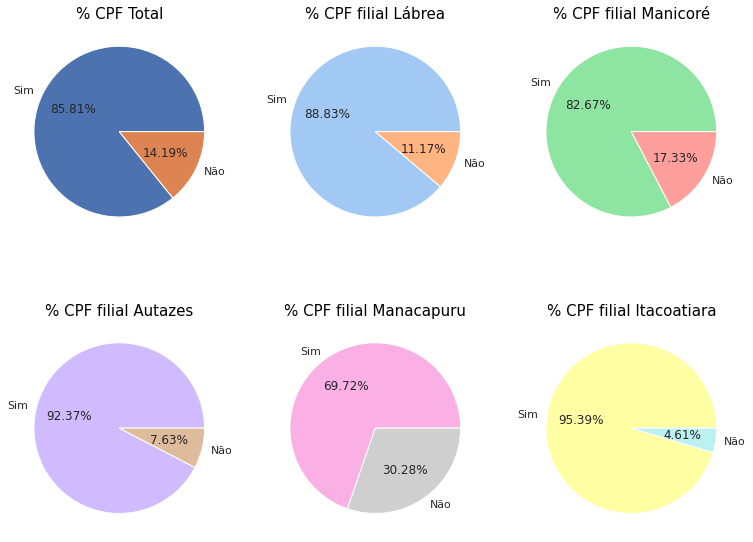

In [31]:
pie_plot(df1, 'cpf', figsize=(13, 10))

Fica claro que no total temos um bom número de CPFs nas notas de compra. Entre as filiais, Itacoatiara é quem mais se descata com a maior porcentagem na nota, enquanto Manacapuru é a loja com o menor percentual.

# Porcentagem de devoluções

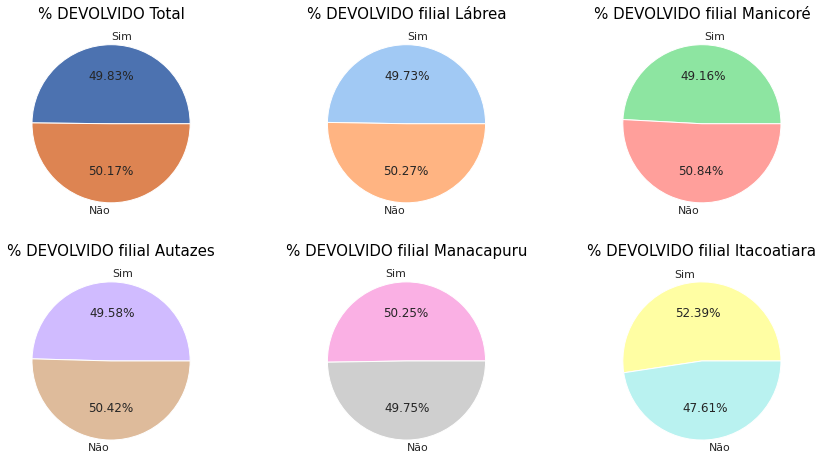

In [32]:
pie_plot(df1, 'devolvido', figsize=(15, 8))

Os índices de devolução são bem altos, com especial atenção para a Loja Manacapuru e Itacoatiara que superaram uma taxa de devolução de $50\%$.

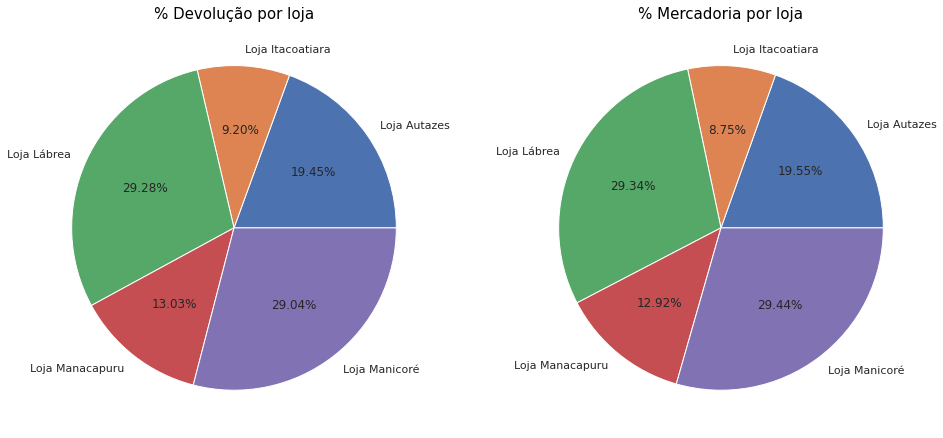

In [33]:
plt.figure(figsize=(16, 12))

data = df1[df1.devolvido == True].groupby('filial').count()
plt.subplot2grid((1, 2), (0, 0))
plt.pie(data.devolvido, labels=data.index, autopct='%.2f%%')
plt.title('% Devolução por loja', fontsize=15, color='black')

data2 = df1.groupby('filial').mercadoria.count()
plt.subplot2grid((1, 2), (0, 1))
plt.pie(data2, labels=data2.index, autopct='%.2f%%')
plt.title('% Mercadoria por loja', fontsize=15, color='black')

plt.savefig('Porcentagem devolução.jpg')
plt.show()

Conseguimos com o gráfico à esquerda observar o percentual participante de cada loja no ato de devolução de produtos em relação ao total de vendas. À direita temos a quantidade de produtos vendidos por loja, e percebemos que a proporção entre o total de vendido e o total devolvido estão bem próximos, ou seja, nenhuma loja apresenta ter uma alta baixa quantidade de vendas, mas proporcionalmente muita devolução.

Agora podemos analisar os principais motivos de devolução que ocorrem. Com essas quantidades em mente, podemos repassar aos gerentes responsáveis de cada loja para que tomem a melhor decisão.

In [34]:
df1.motivo_devolvido.unique()

array([nan, 'Insatisfação com o produto', 'Antecipação de troca',
       'Insatisfação com o atendimento', 'Problema na Entrega',
       'Defeito do produto'], dtype=object)

Devemos eliminar o valor NaN, que representa a não devolução da mercadoria, portanto fora do escopo da análise

In [35]:
df1_devolucao = df1[df1.devolvido == True][['motivo_devolvido', 'filial']]

In [36]:
df1_devolucao

,motivo_devolvido,filial
2,Insatisfação com o produto,Loja Manicoré
3,Antecipação de troca,Loja Lábrea
4,Insatisfação com o atendimento,Loja Manicoré
5,Insatisfação com o atendimento,Loja Manicoré
7,Problema na Entrega,Loja Lábrea
...,...,...
13870,Insatisfação com o atendimento,Loja Autazes
13871,Defeito do produto,Loja Itacoatiara
13872,Insatisfação com o atendimento,Loja Autazes
13873,Insatisfação com o produto,Loja Autazes


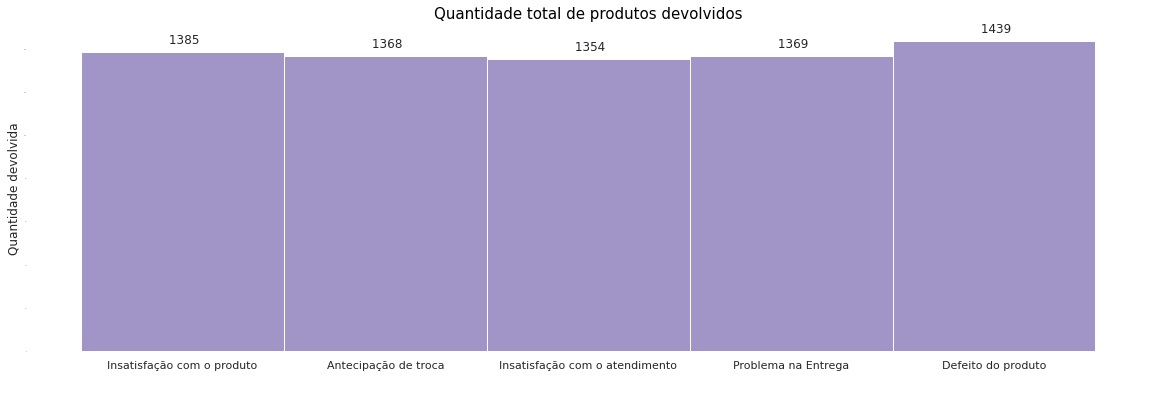

In [37]:
plt.figure(figsize=(20, 6))

ax = sns.histplot(x='motivo_devolvido', data=df1_devolucao, color='m')
ax.set_xlabel(' ')
ax.set_ylabel('Quantidade devolvida')
sns.despine(bottom=True, left=True)
plt.tick_params(axis='y', labelsize=0, length=0)

add_labels(ax)
plt.title('Quantidade total de produtos devolvidos', fontsize=15, color='black')

plt.savefig('Quantidade total de produtos devolvidos.jpg')
plt.show()

E fazendo uma análise individualizada por loja

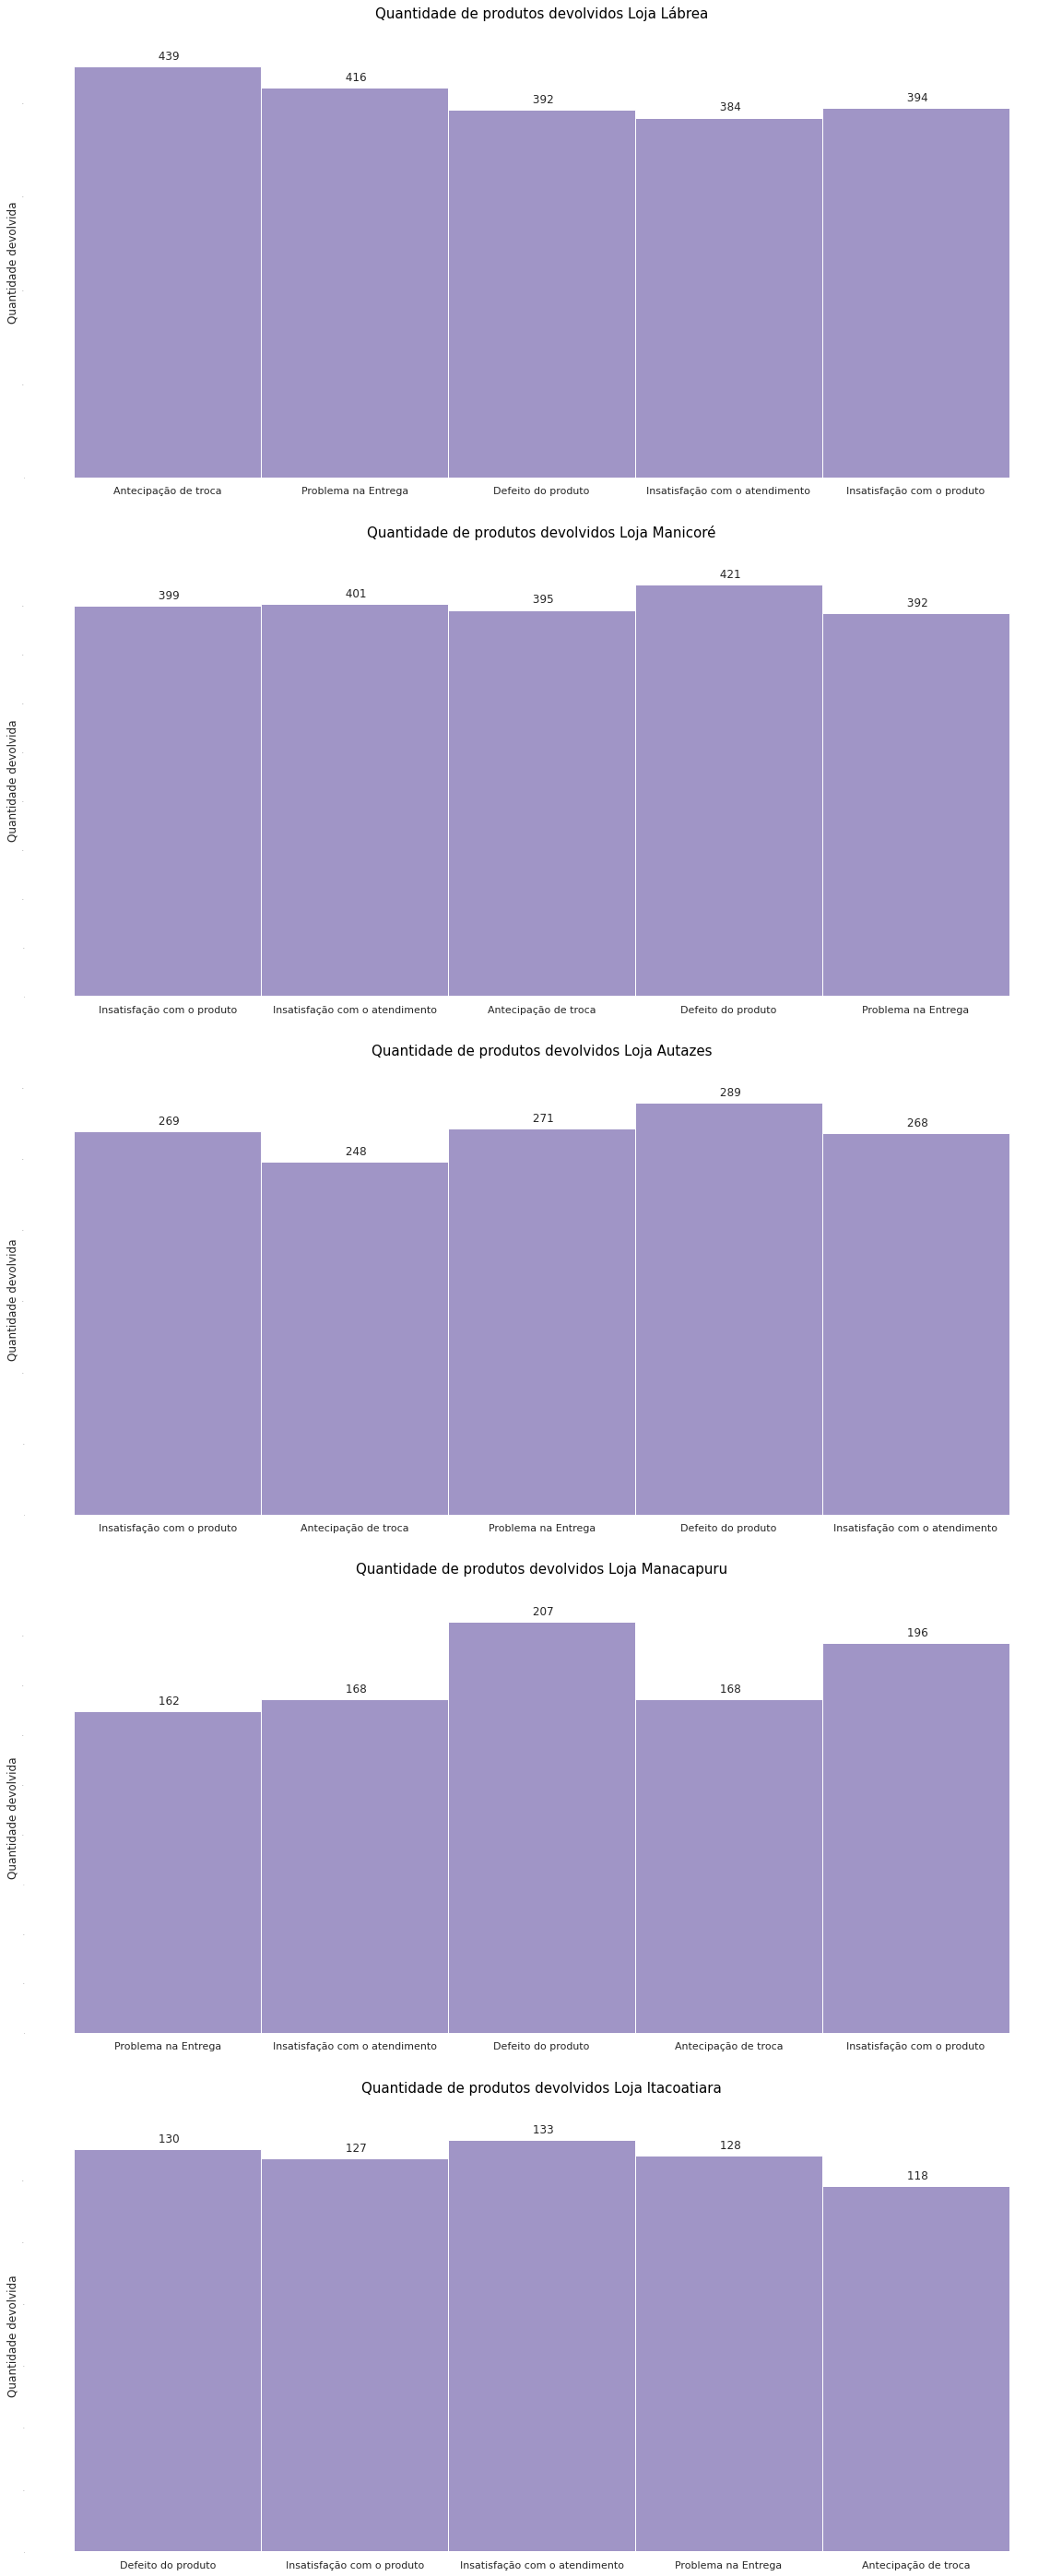

In [38]:
plt.figure(figsize=(20, 50))

x = 0
for filial in df1.filial.unique():
    plt.subplot2grid((5, 1), (x, 0))
    ax = sns.histplot(x='motivo_devolvido', data=df1_devolucao[df1_devolucao.filial == filial],
                      color='m')
    ax.set_xlabel('')
    ax.set_ylabel('Quantidade devolvida')
    sns.despine(bottom=True, left=True)
    plt.tick_params(axis='y', labelsize=0, length=0)
    add_labels(ax)
    plt.title(f'Quantidade de produtos devolvidos {filial}', fontsize=15, color='black', pad=30)
    x += 1
plt.savefig('Quantidade de produtos devolvidos por filial.jpg')
plt.show()

Vendas por Vendedor
---

Primeiro iremos eliminar os nomes que não representam vendedores. Em seguida vamos somar os valores individuais de cada vendedor e então ordenar pelo vendedor de melhor desempenho.

In [39]:
df1_vendedor = df1[(df1.nome != 'AUTOSSERVIÇO') & (df1.nome != 'AUTO') & (df1.nome != '6019999')]

In [40]:
df1_vendedor = df1_vendedor.groupby('nome').valor.sum()

In [41]:
data = pd.DataFrame(data=[{i: df1_vendedor[i] for i in df1_vendedor.index}])
data = data.T
data = data.sort_values(by=[0], ascending=False)

In [42]:
data

,0
MARIA,77168.136
JOSE,30200.544
BRUNO,29565.592
KAREN,27993.824
PATRICIA,26733.176
...,...
HENRIQUE,347.704
COIMBRA,342.440
ALVES,342.044
CARLOS,310.092


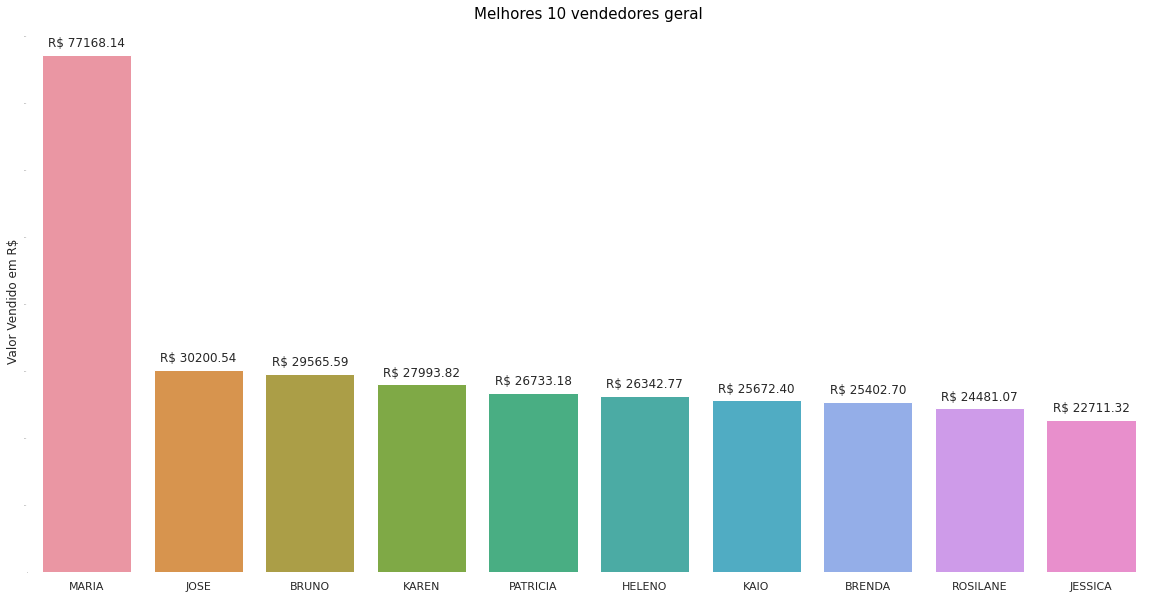

In [43]:
fig = plt.figure(figsize=(20, 10))
sns.set_theme(style="white")
sns.set_palette("Reds")

ax = sns.barplot(x=data.index[:10], y=0, data=data[:10])
ax.set_xlabel(' ')
ax.set_ylabel('Valor Vendido em R$')
sns.despine(bottom=True, left=True)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.title('Melhores 10 vendedores geral', fontsize=15, color='black', pad=10)

add_labels(ax, form=2, prefix='R$')

plt.savefig('Melhores 10 vendedores geral.jpg')
plt.show()

Assim temos a vendedora MARIA que foi a melhor vendedora, com mais que o dobro de diferença do segundo colocado JOSE.

# Top Produtos

Analisando agora a mercadoria que melhor vendeu.

In [44]:
data2 = df1[['mercadoria', 'valor']].groupby('mercadoria').count()
data2 = data2.sort_values(by=['valor'], ascending=False)

In [45]:
data2.head(10)

,valor
mercadoria,
SPLIT 18001 À 30000,103
SPLIT 10001 À 18000,103
TANQUINHO/SEMI-AUTOM,25
JANELA ATÉ 8500 BTUS,25
JANELA 8501 À 10000,25
SMARTPHONE LIVRE,25
SMART MULTISIM LIVRE,25
SANDUICHEIRA,25
SYSTEM,25


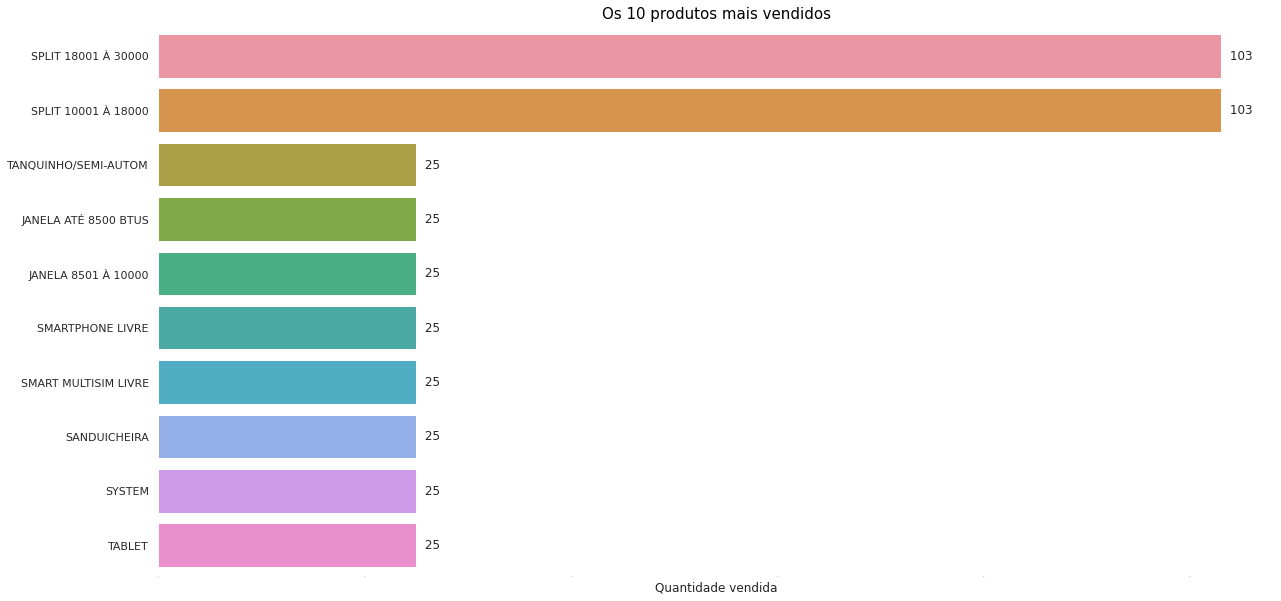

In [46]:
fig = plt.figure(figsize=(20, 10))
sns.set_theme(style="white")
sns.set_palette("Reds")
ax = sns.barplot(y=data2.index[:10], x='valor', data=data2[:10], orient='h')
ax.set_xlabel('Quantidade vendida')
ax.set_ylabel('')
plt.tick_params(axis='x', labelsize=0, length=0)
sns.despine(bottom=True, left=True)
plt.title('Os 10 produtos mais vendidos', fontsize=15, color='black', pad=10)

add_labels(ax, orient='h')

plt.savefig('Os 10 produtos mais vendidos.jpg')
plt.show()

Fica claro aqui que o aparelho mais vendido é também o que tem um dos preços mais elevados em média, no mercado. Logo é natural supor que o __SPLIT 100001 À 18000__ e o __SPLIT 18001 À 30000__ desempenhem o papel de "carro chefe" de vendas e logre um faturamento alto.

---
# Analisando o segundo conjunto de dados

---

Vamos agora analisar o segundo conjunto de dados

In [47]:
df2.head()

,cod_Loja,data_compra,inicio,termino,Loja,cod_Produto,produto,EAN,Valor Unitário Sem Imposto,quantidade,valor_total,Impostos,Dinheiro de Volta (Aplicado direto no total)
0,410,2019-07-05 10:30:41,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
1,410,2019-07-05 11:58:18,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
2,410,2019-07-05 14:06:58,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
3,410,2019-07-05 14:50:06,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
4,410,2019-07-05 16:04:56,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,3,9993.87,1128.87,135.0


In [48]:
df2.columns = ['cod_loja', 'data_compra', 'inicio', 'termino', 'loja', 'cod_produto',
               'produto', 'EAN', 'valor_sem_imposto', 'quantidade', 'valor_total',
               'impostos', 'dinheiro_devolvido']

In [49]:
df2.groupby('loja').dinheiro_devolvido.sum()

loja
Unidade Manaus 1    22706.25
Unidade Manaus 3    21847.50
Name: dinheiro_devolvido, dtype: float64

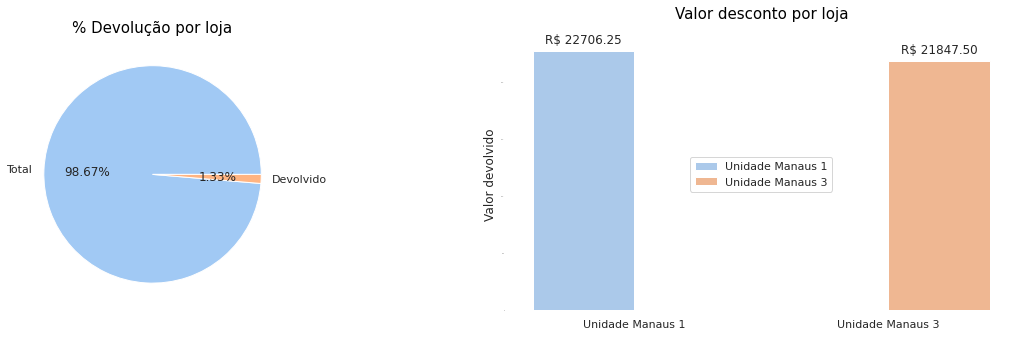

In [50]:
plt.figure(figsize=(20, 5))

plt.subplot2grid((1, 2), (0, 0))
colors = sns.color_palette('pastel')[0:2]
plt.pie([df2.valor_total.sum(), df2.dinheiro_devolvido.sum()],
        labels=['Total', 'Devolvido'], autopct='%.2f%%', colors=colors)
plt.title('% Devolução por loja', fontsize=15, color='black')

plt.subplot2grid((1, 2), (0, 1))
sns.set_palette("pastel")
ax = sns.barplot(x='loja', y='dinheiro_devolvido', data=df2,
                 estimator=np.sum, ci=None, hue=df2.loja)
ax.set_xlabel(' ')
ax.set_ylabel('Valor devolvido')
sns.despine(bottom=True, left=True)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.title('Valor desconto por loja', fontsize=15, color='black', pad=20)
plt.legend(loc='center')
add_labels(ax, prefix='R$', form=2)

plt.savefig('Descontos.jpg')
plt.show()